# Sheridan Kamal

## DATA 73500 - In Class Activity 3/9/20

### Project
This project seeks to explore Population Growth and Population Density in the United States.

### Data
Using the provided United States data (http://data.shortell.nyc/files/USstates.xlsx), I created two models to explore factors that affect Population Growth and Population Density in the United States.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('http://data.shortell.nyc/files/USstates.xlsx', sheet_name='USstates', index_col='State')
data.head()

,Hom95,Hom10,Rape10,Robb10,Asslt10,Burg10,Larc10,Carthft10,HS,College,...,Black,Asian,Hispanic,Older,PopRank,PopGrow,PopDense,SthDUMMY,Unemplymnt,Younger
State,,,,,,,,,,,,,,,,,,,,,
Alabama,11.2,5.7,28.2,99.6,244.2,879.4,2415.6,221.8,82.1,22.0,...,26.2,1.1,3.9,13.8,23,7.5,94.4,0,7.1,23.8
Alaska,9.1,4.4,75.0,83.6,475.8,437.2,2187.3,228.0,91.4,26.6,...,3.3,5.4,5.5,7.7,47,13.3,1.2,1,6.6,26.5
Arizona,10.4,6.4,33.9,108.5,259.3,794.3,2403.2,336.5,84.2,25.6,...,4.1,2.6,29.6,13.8,16,24.6,56.3,1,7.9,25.4
Arkansas,10.4,4.7,45.0,81.3,374.3,1114.9,2253.8,190.1,82.4,18.9,...,15.4,1.2,6.4,14.4,32,9.1,56.0,0,7.1,24.4
California,11.2,4.9,22.4,156.0,257.4,614.3,1612.1,409.4,80.6,29.9,...,6.2,13.0,37.6,11.4,1,10.0,239.1,1,9.8,24.9


In [2]:
data.describe()

,Hom95,Hom10,Rape10,Robb10,Asslt10,Burg10,Larc10,Carthft10,HS,College,...,Black,Asian,Hispanic,Older,PopRank,PopGrow,PopDense,SthDUMMY,Unemplymnt,Younger
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.712000,4.136000,30.932000,90.266000,240.226000,664.930000,1984.458000,206.960000,86.874000,27.374000,...,10.330000,3.680000,10.610000,13.292000,25.520000,9.852000,194.960000,0.720000,7.004000,23.846000
std,3.620274,2.060192,10.441292,48.747524,107.363475,234.927985,358.036226,84.092607,3.411913,4.881736,...,9.557138,5.586427,9.980353,1.664005,14.556351,7.257346,261.089775,0.453557,1.663284,1.930022
min,0.900000,1.000000,11.200000,11.800000,59.800000,292.300000,1348.500000,70.500000,79.900000,17.300000,...,0.400000,0.600000,1.200000,7.700000,1.000000,-0.600000,1.200000,0.000000,3.200000,19.800000
25%,3.900000,2.450000,24.600000,57.650000,155.875000,457.000000,1677.800000,143.100000,83.975000,24.150000,...,3.000000,1.325000,4.250000,12.425000,13.250000,4.350000,44.450000,0.000000,5.550000,22.800000
50%,6.250000,4.350000,30.750000,88.600000,216.800000,600.950000,1997.400000,206.450000,87.500000,26.550000,...,7.000000,2.250000,8.200000,13.500000,25.500000,7.850000,98.750000,1.000000,7.000000,23.750000
75%,9.325000,5.450000,34.600000,124.850000,321.525000,868.775000,2293.725000,249.550000,89.800000,30.575000,...,15.175000,3.800000,12.225000,14.275000,37.750000,13.900000,209.500000,1.000000,8.200000,24.850000
max,17.000000,11.200000,75.000000,203.700000,475.800000,1114.900000,2617.200000,409.400000,91.800000,38.200000,...,37.000000,38.600000,46.300000,17.300000,50.000000,35.100000,1195.500000,1.000000,10.200000,31.600000


In [3]:
data.corr()

,Hom95,Hom10,Rape10,Robb10,Asslt10,Burg10,Larc10,Carthft10,HS,College,...,Black,Asian,Hispanic,Older,PopRank,PopGrow,PopDense,SthDUMMY,Unemplymnt,Younger
Hom95,1.000000,0.881942,0.021494,0.605756,0.568543,0.662675,0.379385,0.527512,-0.730184,-0.379883,...,0.679061,0.013161,0.262049,-0.318565,-0.477388,0.150736,-0.069014,-0.536080,0.380191,0.377081
Hom10,0.881942,1.000000,-0.029418,0.677606,0.638078,0.640437,0.371458,0.449053,-0.690802,-0.341153,...,0.752307,-0.107659,0.219553,-0.125941,-0.429299,0.049939,0.079389,-0.454196,0.344909,0.236135
Rape10,0.021494,-0.029418,1.000000,-0.192256,0.403155,0.111991,0.203689,0.129212,0.175601,-0.236630,...,-0.267575,-0.136175,0.015333,-0.333704,0.373362,0.208026,-0.456137,0.110959,-0.237735,0.314009
Robb10,0.605756,0.677606,-0.192256,1.000000,0.495220,0.449995,0.240401,0.573597,-0.499346,-0.001183,...,0.596263,0.192989,0.351232,-0.124884,-0.615735,0.164058,0.411300,-0.142033,0.576566,0.119086
Asslt10,0.568543,0.638078,0.403155,0.495220,1.000000,0.539562,0.400092,0.472126,-0.394845,-0.279327,...,0.330415,-0.064291,0.291512,-0.152089,-0.117621,0.272935,-0.046024,-0.274734,0.152776,0.182307
Burg10,0.662675,0.640437,0.111991,0.449995,0.539562,1.000000,0.629497,0.495556,-0.678184,-0.534585,...,0.573847,-0.089047,0.172165,-0.022813,-0.290154,0.235838,-0.120638,-0.625974,0.297687,0.230385
Larc10,0.379385,0.371458,0.203689,0.240401,0.400092,0.629497,1.000000,0.499705,-0.217519,-0.257803,...,0.315120,0.039414,0.125334,-0.225627,-0.172832,0.378943,-0.242039,-0.360657,-0.039178,0.326442
Carthft10,0.527512,0.449053,0.129212,0.573597,0.472126,0.495556,0.499705,1.000000,-0.356424,-0.032887,...,0.220301,0.459261,0.486930,-0.327852,-0.347665,0.430335,0.038469,-0.054610,0.371380,0.348733
HS,-0.730184,-0.690802,0.175601,-0.499346,-0.394845,-0.678184,-0.217519,-0.356424,1.000000,0.493130,...,-0.574416,0.091379,-0.384247,0.043206,0.420481,-0.133834,-0.046451,0.690199,-0.506393,-0.198905
College,-0.379883,-0.341153,-0.236630,-0.001183,-0.279327,-0.534585,-0.257803,-0.032887,0.493130,1.000000,...,-0.181400,0.260146,0.117831,-0.108885,-0.079330,-0.123435,0.489377,0.498980,-0.091023,-0.182598


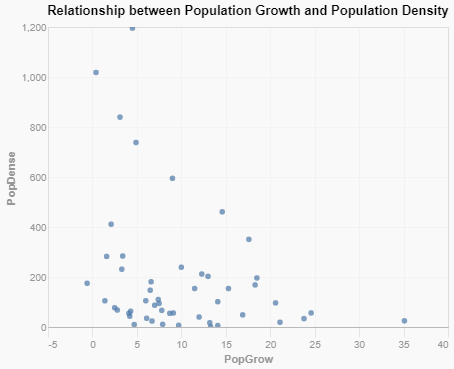

In [4]:
#Must have altair and vega packages installed
#Run cell for interactivity
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('quartz')

alt.Chart(data).mark_circle().encode(x='PopGrow', y='PopDense', tooltip=['PopGrow', 'PopDense']).properties(title='Relationship between Population Growth and Population Density').interactive().display() #Downloadable as SVG and PNG

<IPython.core.display.Javascript object>


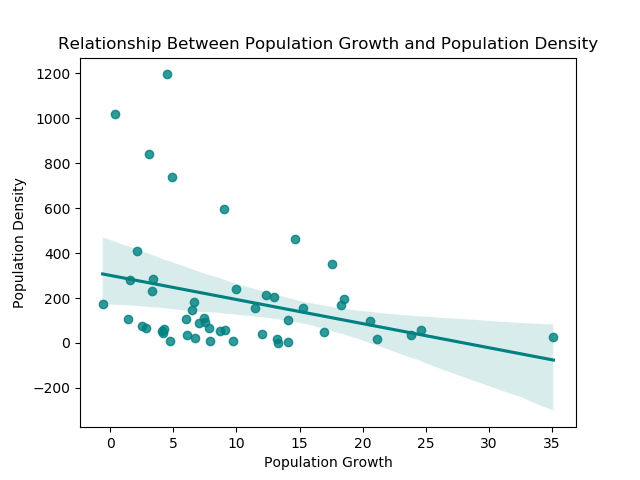

Text(0, 0.5, 'Population Density')

In [5]:
%matplotlib notebook

sns.regplot(x = 'PopGrow', y = 'PopDense', color = 'teal', data = data, marker = 'o')

plt.title("Relationship Between Population Growth and Population Density")
plt.xlabel("Population Growth")
plt.ylabel("Population Density")

As we can see from the above regression plot, Population Growth and Population Density have an inverse relationship and are negatively correlated.

In [6]:
result = sm.ols(formula = "PopDense ~ PopGrow + InfantMort + DeathRate + AbortRate + BirthRate", data = data, missing = 'drop').fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PopDense   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     8.453
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.14e-05
Time:                        19:56:22   Log-Likelihood:                -331.85
No. Observations:                  50   AIC:                             675.7
Df Residuals:                      44   BIC:                             687.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    404.5218    415.985      0.972      0.336    -433.840    1242.884
PopGrow       -9.7267      4.703     -2.068      0.045     -19.205      -0.248
InfantMort    -0.6221     33.051     -0.019      0.985     -67.231      65.987
DeathRate    -17.8599     49.139     -0.363      0.718    -116.894      81.174
AbortRate     17.8305      3.686      4.838      0.000      10.403      25.258
BirthRate    -18.6264     20.979     -0.888      0.379     -60.907      23.654
==============================================================================
Omnibus:                       24.510   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.720
Skew:                           1.586   Prob(JB):                     2.37e-09
Kurtosis:                       6.001   Cond. No.                         388.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model, only 'PopGrow' and 'AbortRate' are significant variables (at the 5% level) in explaining 'PopDense'. Although the model is overall significant at the 1% level, the R-squared is only 0.49 meaning only 49% of the variance in 'PopDense' is being explained by the model.

In [7]:
result2 = sm.ols(formula = "PopGrow ~ PopDense + InfantMort + DeathRate + AbortRate + BirthRate", data = data, missing = 'drop').fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PopGrow   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     5.435
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           0.000560
Time:                        19:56:22   Log-Likelihood:                -157.52
No. Observations:                  50   AIC:                             327.0
Df Residuals:                      44   BIC:                             338.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.4360     12.654     -1.220      0.229     -40.938      10.066
PopDense      -0.0091      0.004     -2.068      0.045      -0.018      -0.000
InfantMort    -0.6685      1.006     -0.664      0.510      -2.697       1.360
DeathRate     -0.0848      1.506     -0.056      0.955      -3.120       2.950
AbortRate      0.2823      0.133      2.124      0.039       0.014       0.550
BirthRate      2.0889      0.566      3.691      0.001       0.948       3.230
==============================================================================
Omnibus:                        7.692   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.145
Skew:                           0.680   Prob(JB):                       0.0281
Kurtosis:                       4.258   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model, only 'AbortRate' and 'BirthRate' are significant variables (at the 5% level) in explaining 'PopGrow'. Although the model is overall significant at the 1% level, the R-squared is only 0.382 meaning only 38.2% of the variance in 'PopGrow' is being explained by the model.